In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('mycsvfile.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,4.1,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,5.2,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,8.2,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,6.4,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,5.7,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [2]:
print(len(df))
print(df['rating'].unique())

6234
[4.1 5.2 8.2 6.4 5.7 7.2 6.1 4.9 6.9 5.6 0.  6.2 6.3 5.8 7.  4.8 5.5 6.5
 6.6 6.8 5.9 5.4 9.2 5.3 7.9 8.1 6.  7.3 7.8 7.1 7.7 7.5 8.  7.4 8.3 3.3
 7.6 4.5 4.4 6.7 4.3 4.7 3.8 5.1 8.5 8.8 3.6 8.4 8.7 3.7 9.5 9.  9.1 3.9
 4.6 8.6 3.1 2.4 4.  1.8 9.3 4.2 3.  3.5 5.  8.9 3.2 2.2 2.6 2.3 2.5 2.9
 2.1 2.8 9.4 9.7 3.4 2.7]


In [3]:
print(df['country'].unique())
print(df['country'][0].split(", "))
print(df['country'][1].split(", "))

['United States, India, South Korea, China' 'United Kingdom'
 'United States' 'Spain' 'Bulgaria, United States, Spain, Canada' 'Chile'
 'United States, United Kingdom, Denmark, Sweden' 'none'
 'Netherlands, Belgium, United Kingdom, United States' 'France, Belgium'
 'United States, Uruguay' 'United States,' 'Thailand'
 'China, Canada, United States' 'Belgium, United Kingdom, United States'
 'Belgium, France' 'India' 'France' 'United States, Canada' 'Pakistan'
 'Canada' 'United Kingdom, France' 'United States, United Kingdom'
 'South Korea' 'Denmark, United States' 'United Kingdom, United States'
 'Turkey, United States' 'Brazil'
 'Denmark, France, Italy, Belgium, Netherlands' 'Indonesia' 'China'
 'Ireland, United Kingdom' 'Turkey' 'Hong Kong' 'France, Morocco'
 'Hong Kong, China' 'Mexico' 'United States, Mexico' 'Vietnam'
 'France, Canada' 'Spain, Argentina' 'Nigeria' 'Japan'
 'United Kingdom, Canada, United States'
 'United Kingdom, France, Germany, Spain'
 'United States, Greece, Unit

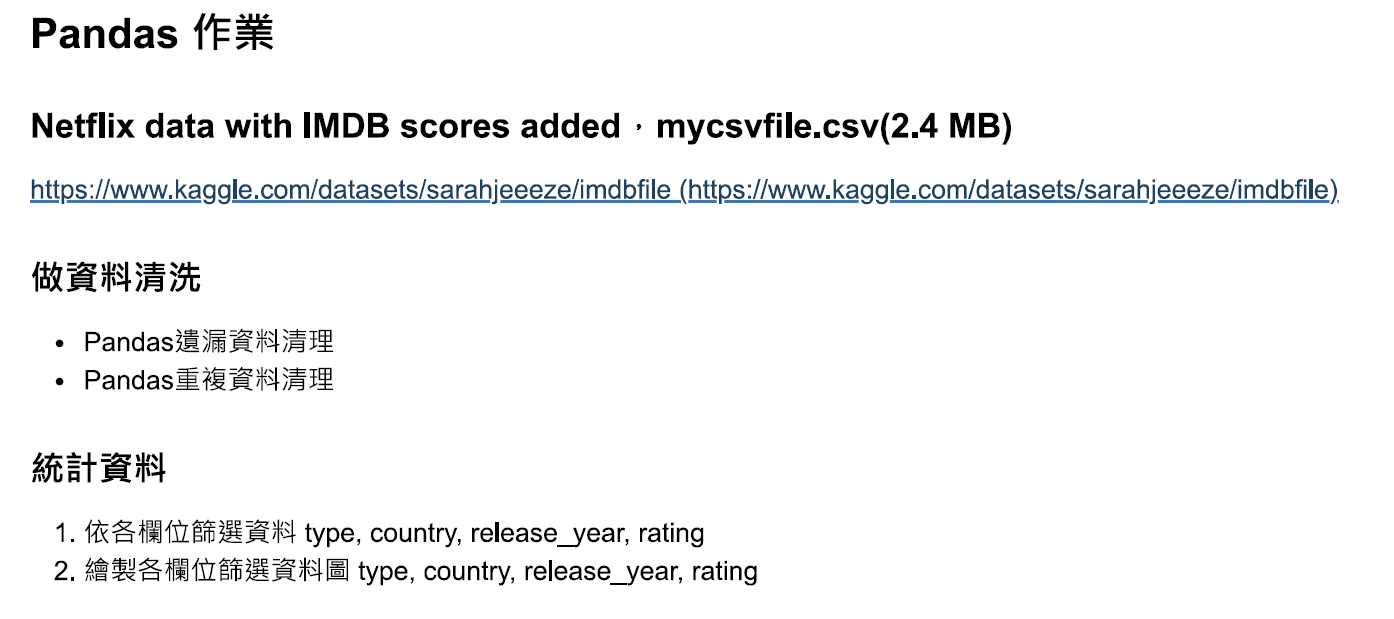

___

## 資料清洗

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('mycsvfile.csv')

df_sample = df.copy()
print(df_sample.isnull().sum())  # 空值總數
print('-'*30)
print("NaN existing columns:",df_sample.isnull().any(axis=0).sum()) # 有空值欄位數量
print("Incomplete records:",df_sample.isnull().any(axis=1).sum()) # 不完整資料筆數

show_id            0
type               0
title              0
director        1969
cast               0
country            0
date_added        11
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64
------------------------------
NaN existing columns: 2
Incomplete records: 1969


In [5]:
df_sample.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,4.1,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,5.2,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,8.2,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,6.4,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,5.7,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [6]:
# 清理遺漏資料
# 以前項往後填的方式清除空值(director, date_added)
df_sample['director'] = df_sample['director'].fillna(method='ffill')
df_sample['date_added'] = df_sample['date_added'].fillna(method='ffill')

print(df_sample.isnull().sum())   # 空值總數
print('-'*30)
print("NaN existing columns:",df_sample.isnull().any(axis=0).sum()) # 有空值欄位數量
print("Incomplete records:",df_sample.isnull().any(axis=1).sum()) # 不完整資料筆數

df_sample.head()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64
------------------------------
NaN existing columns: 0
Incomplete records: 0


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,4.1,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,"Richard Finn, Tim Maltby",Jandino Asporaat,United Kingdom,"September 9, 2016",2016,5.2,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,"Richard Finn, Tim Maltby","Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,8.2,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,"Richard Finn, Tim Maltby","Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,6.4,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,5.7,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [7]:
# 清理重複資料
# 最常出現重複資料的情況在於重複紀錄，也就是id重複，故針對id執行清理

print(len(df_sample))  # 原始資料筆數
df_sample.drop_duplicates(subset='show_id',keep='first',inplace=True)
print(len(df_sample))  # 去除重複以後資料筆數

6234
6234


In [9]:
# 簡化 rating 與 release_year 分組，以便於視覺化
print(df_sample['rating'].unique())
print(df_sample['release_year'].unique())

# rating 取整數，無條件捨去小數點後位數
df_sample['rating'] = df_sample['rating'].astype('int32')
print(df_sample['rating'].unique())

# release_year 以10年一組的方式分組，年分的個位數全部改為'0'
df_sample['release_year'] = df_sample['release_year']/10
df_sample['release_year'] = df_sample['release_year'].astype('int32')
df_sample['release_year'] = df_sample['release_year']*10
print(df_sample['release_year'].unique())

[4.1 5.2 8.2 6.4 5.7 7.2 6.1 4.9 6.9 5.6 0.  6.2 6.3 5.8 7.  4.8 5.5 6.5
 6.6 6.8 5.9 5.4 9.2 5.3 7.9 8.1 6.  7.3 7.8 7.1 7.7 7.5 8.  7.4 8.3 3.3
 7.6 4.5 4.4 6.7 4.3 4.7 3.8 5.1 8.5 8.8 3.6 8.4 8.7 3.7 9.5 9.  9.1 3.9
 4.6 8.6 3.1 2.4 4.  1.8 9.3 4.2 3.  3.5 5.  8.9 3.2 2.2 2.6 2.3 2.5 2.9
 2.1 2.8 9.4 9.7 3.4 2.7]
[2019 2016 2013 2017 2014 2015 2009 2012 2010 2018 2011 2004 2000 1983
 1982 2006 2005 2002 1997 2008 2007 2003 1981 1991 1994 1988 1976 1973
 1974 1989 1986 1984 1978 1998 1972 1979 1960 1959 2001 1995 1992 1990
 1975 1985 1980 1970 1996 1967 1999 1987 1968 1993 2020 1958 1965 1956
 1962 1955 1977 1945 1946 1942 1944 1947 1943 1969 1954 1966 1971 1964
 1925 1963]
[4 5 8 6 7 0 9 3 2 1]
[2010 2000 1980 1990 1970 1960 1950 2020 1940 1920]


In [ ]:
# 輸出檔案用於資料視覺化
df_sample.to_csv('imdb_sample.csv',encoding='utf-8-sig')

## 統計資料與資料視覺化

## 資料清洗

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 讀取去除空值與重複值的檔案
df_sample= pd.read_csv('imdb_sample.csv',index_col=0)
df_sample.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2010,4,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,"Richard Finn, Tim Maltby",Jandino Asporaat,United Kingdom,"September 9, 2016",2010,5,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,"Richard Finn, Tim Maltby","Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2010,8,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,"Richard Finn, Tim Maltby","Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2010,6,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2010,5,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [3]:
# 取出 country 當中所有不同的值
all_country = []
for x in df_sample['country']:
    conut_list = x.split(", ")
    for y in conut_list:
        all_country.append(y)
#print(pd.Series(all_country).unique())
country_list = list(pd.Series(all_country).unique())
print(country_list)

# 紀錄 country 包含 'United States' 的資料
is_the_US = []  # 建立一個空的 list 
for x in df_sample['country']:
    cont_list = x.split(", ")
    if 'United States' in cont_list:
        is_the_US.append(1)
    else:
        is_the_US.append(0)
print(np.array(is_the_US)[:100])


['United States', 'India', 'South Korea', 'China', 'United Kingdom', 'Spain', 'Bulgaria', 'Canada', 'Chile', 'Denmark', 'Sweden', 'none', 'Netherlands', 'Belgium', 'France', 'Uruguay', 'United States,', 'Thailand', 'Pakistan', 'Turkey', 'Brazil', 'Italy', 'Indonesia', 'Ireland', 'Hong Kong', 'Morocco', 'Mexico', 'Vietnam', 'Argentina', 'Nigeria', 'Japan', 'Germany', 'Greece', 'Norway', 'Switzerland', 'United Arab Emirates', 'Lebanon', 'Cambodia', 'Russia', 'Poland', 'Israel', 'Australia', 'Portugal', 'Egypt', 'Taiwan', 'Austria', 'Czech Republic', 'Senegal', 'Soviet Union', 'Peru', 'Ukraine', 'Malaysia', 'South Africa', 'Nepal', 'Philippines', 'Serbia', 'Colombia', 'Singapore', 'Luxembourg', 'West Germany', 'Cayman Islands', 'New Zealand', 'Venezuela', 'Jordan', 'Saudi Arabia', 'Iceland', 'Poland,', 'Malta', 'Qatar', 'United Kingdom,', 'Iran', 'Finland', 'Iraq', 'Liechtenstein', 'Albania', 'Slovakia', 'Samoa', 'Ghana', 'Botswana', 'Hungary', 'Guatemala', 'Malawi', 'Paraguay', 'Somalia'

In [4]:
# 紀錄不同 country 在所有資料當中是否出現的 DataFrame
count_appear = []

for x in df_sample['country']:
    count_list = x.split(", ")
    for y in country_list:
        if y in count_list:
            count_appear.append(1)
        else:
            count_appear.append(0)
print(np.array(count_appear)[:len(country_list)])

print(len(count_appear))
count_appear = np.array(count_appear).reshape(len(df_sample),len(country_list))
print(count_appear.shape)
count_appear = pd.DataFrame(count_appear,columns=country_list)
count_appear

[1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
710676
(6234, 114)


,United States,India,South Korea,China,United Kingdom,Spain,Bulgaria,Canada,Chile,Denmark,...,Mauritius,Nicaragua,Kazakhstan,Armenia,Mongolia,Bermuda,Ecuador,Syria,Kuwait,Cyprus
0,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6229,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6230,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6231,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6232,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# 統計不同 country 的出現次數
country_count = []
for i in range(len(country_list)):
    x = count_appear.iloc[:,i]
    y = sum(x)
    country_count.append(y)
country_count = pd.Series(country_count,index=country_list)  # 照country出現順序排列
print(country_count)
print("-"*30)
print(country_count.sort_values(ascending=False))  # 照country數量多寡排列
print("-"*30)
print(country_count.sort_index(ascending=True))  # 照country名稱排列

United States     2609
India              838
South Korea        162
China              120
United Kingdom     601
                  ... 
Bermuda              1
Ecuador              1
Syria                1
Kuwait               1
Cyprus               1
Length: 114, dtype: int64
------------------------------
United States     2609
India              838
United Kingdom     601
none               476
Canada             318
                  ... 
Kenya                1
Sudan                1
Sri Lanka            1
Panama               1
Cyprus               1
Length: 114, dtype: int64
------------------------------
Afghanistan       1
Albania           1
Argentina        68
Armenia           1
Australia       126
               ... 
Venezuela         3
Vietnam           4
West Germany      5
Zimbabwe          2
none            476
Length: 114, dtype: int64


### 依各欄位篩選資料

In [5]:
# 上面以 count_appear 資料表儲存了有關country是否出現的紀錄，透過該資料表可對 df_sample 進行國家的篩選
# 並以 country_count 資料表紀錄不同 country 的出現次數
# country 包含 'United States' 的個數
print('United States in:', len(df_sample[(count_appear['United States']==1)]))
print('-'*30)
# country 包含 'United States' 且 type 為 'Movie' 的個數
print('United States in (Movie):', len(df_sample[(count_appear['United States']==1)&(df_sample['type']=='Movie')]))

United States in: 2609
------------------------------
United States in (Movie): 1923


In [6]:
# country 包含 'United States' 且 type 為 'Movie' 的資料表
df_sample[(count_appear['United States']==1)&(df_sample['type']=='Movie')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2010,4,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2010,5,99 min,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2010,6,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2010,5,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...
11,70299204,Movie,Kidnapping Mr. Heineken,Daniel Alfredson,"Jim Sturgess, Sam Worthington, Ryan Kwanten, A...","Netherlands, Belgium, United Kingdom, United S...","September 8, 2017",2010,6,95 min,"Action & Adventure, Dramas, International Movies","When beer magnate Alfred ""Freddy"" Heineken is ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
5572,80097468,Movie,The Bad Kids,"Keith Fulton, Louis Pepe",bam,United States,"April 1, 2017",2010,7,101 min,Documentaries,"In this documentary, teachers at a Mojave Dese..."
5577,80085438,Movie,Frank and Cindy,G.J. Echternkamp,bam,United States,"April 1, 2016",2000,6,70 min,Documentaries,Frank was a rising pop star when he married Ci...
5578,80085439,Movie,Frank and Cindy,G.J. Echternkamp,"Rene Russo, Oliver Platt, Johnny Simmons, Jane...",United States,"April 1, 2016",2010,6,102 min,"Comedies, Dramas, Independent Movies",A student filmmaker vengefully turns his camer...
5579,80011846,Movie,Iverson,Zatella Beatty,Allen Iverson,United States,"April 1, 2016",2010,7,88 min,"Documentaries, Sports Movies",This unfiltered documentary follows the rocky ...


In [7]:
# country 包含 'United States' 且 type 為 'Movie' 的，以 release_year 分群，計算個數
print('United States in (Movie):')
print(df_sample[(count_appear['United States']==1)&(df_sample['type']=='Movie')].groupby('release_year')['show_id'].count())

United States in (Movie):
release_year
1940      14
1950       5
1960      11
1970      21
1980      38
1990      98
2000     274
2010    1460
2020       2
Name: show_id, dtype: int64


In [8]:
# country 包含 'United States' 且 type 為 'Movie' 的，以 release_year 分群，計算平均 rating
print('Rating of thoose United States in (Movie):')
print(df_sample[(count_appear['United States']==1)&(df_sample['type']=='Movie')].groupby('release_year')['rating'].mean())
print(df_sample[(count_appear['United States']==1)&(df_sample['type']=='Movie')].groupby('release_year')['rating'].agg(['mean','max','min']))

Rating of thoose United States in (Movie):
release_year
1940    6.071429
1950    7.000000
1960    6.909091
1970    6.619048
1980    6.842105
1990    6.387755
2000    6.080292
2010    5.811644
2020    4.500000
Name: rating, dtype: float64
                  mean  max  min
release_year                    
1940          6.071429    8    0
1950          7.000000    8    6
1960          6.909091    8    5
1970          6.619048    8    5
1980          6.842105    8    5
1990          6.387755    8    4
2000          6.080292    8    0
2010          5.811644    8    0
2020          4.500000    5    4


In [9]:
# 取出數值list，用於視覺化的坐標軸
print(list(df_sample[(count_appear['United States']==1)&(df_sample['type']=='Movie')].groupby('release_year')['rating'].mean()))


[6.071428571428571, 7.0, 6.909090909090909, 6.619047619047619, 6.842105263157895, 6.387755102040816, 6.08029197080292, 5.811643835616438, 4.5]


In [10]:
# 計算各種類個數
print(df_sample.groupby('type')['show_id'].count())
print("-"*30)
# 計算各種類平均rating
print(df_sample.groupby('type')['rating'].mean())
print("-"*30)
# 計算各年代個數
print(df_sample.groupby('release_year')['show_id'].count())
print("-"*30)
# 計算不同種類各年代個數
print(df_sample[(df_sample['type']=='Movie')].groupby('release_year')['show_id'].count())
print()
print(df_sample[(df_sample['type']=='TV Show')].groupby('release_year')['show_id'].count())
print("-"*30)
# 計算不同種類各rating個數
print(df_sample[(df_sample['type']=='Movie')].groupby('rating')['show_id'].count())
print()
print(df_sample[(df_sample['type']=='TV Show')].groupby('rating')['show_id'].count())
print("-"*30)
# 計算各rating個數
print(df_sample.groupby('rating')['show_id'].count())
print("-"*30)
# 計算country包含'United States'的各rating個數
print(df_sample[(count_appear['United States']==1)].groupby('rating')['show_id'].count())
print("-"*30)

type
Movie      4265
TV Show    1969
Name: show_id, dtype: int64
------------------------------
type
Movie      5.796483
TV Show    6.381920
Name: rating, dtype: float64
------------------------------
release_year
1920       1
1940      15
1950       6
1960      21
1970      56
1980      89
1990     191
2000     625
2010    5205
2020      25
Name: show_id, dtype: int64
------------------------------
release_year
1940      14
1950       6
1960      18
1970      52
1980      82
1990     165
2000     512
2010    3410
2020       6
Name: show_id, dtype: int64

release_year
1920       1
1940       1
1960       3
1970       4
1980       7
1990      26
2000     113
2010    1795
2020      19
Name: show_id, dtype: int64
------------------------------
rating
0     180
2      22
3      76
4     303
5     758
6    1382
7    1210
8     320
9      14
Name: show_id, dtype: int64

rating
0    151
1      1
2      1
3     14
4     47
5    123
6    335
7    699
8    567
9     31
Name: show_id, dtype: int6

### 繪製各欄位篩選資料圖

type
Movie      4265
TV Show    1969
Name: show_id, dtype: int64


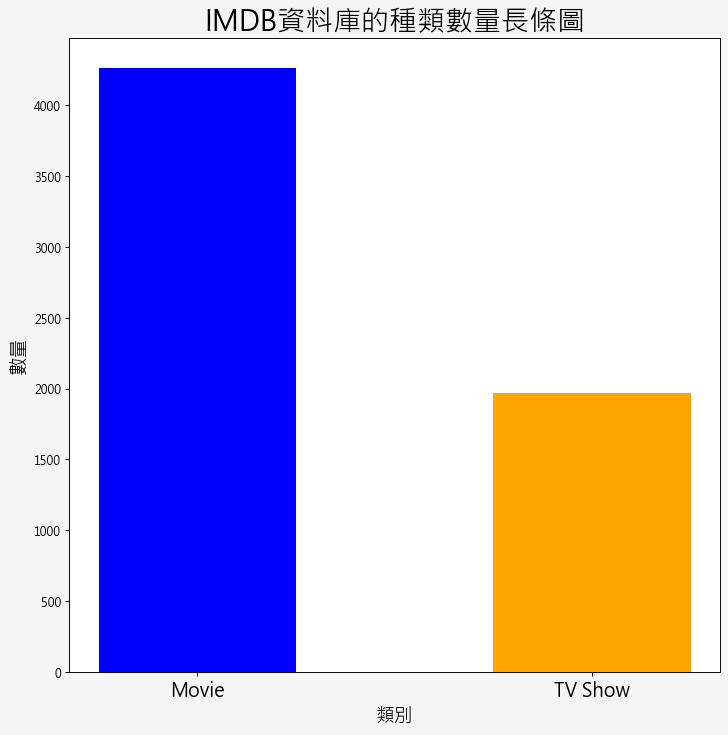

In [11]:
import matplotlib.pyplot as plt

# 將資料依照類別分組
print(df_sample.groupby('type')['show_id'].count())


# 建立分類長條圖
listy = list(df_sample.groupby('type')['show_id'].count())
listx = list(df_sample['type'].unique())

plt.figure(figsize=[10,10],dpi=84,facecolor='whitesmoke')
plt.bar(listx,listy,width=0.5,color=['blue','orange'])
plt.xlabel("類別",fontsize=16)
plt.ylabel("數量",fontsize=16)
plt.xticks(listx,fontsize=16)
plt.title("IMDB資料庫的種類數量長條圖",fontsize=24)
plt.rcParams['font.sans-serif'] = 'Microsoft JhengHei'
plt.rcParams['axes.unicode_minus'] = False
plt.show()

In [46]:
# 分析不同年代的種類數量
print(df_sample['release_year'].unique())
print(list(df_sample[df_sample['type']=="Movie"].groupby('release_year')['show_id'].count()))
print(list(df_sample[df_sample['type']=='TV Show'].groupby('release_year')['show_id'].count()))
print(df_sample[df_sample['type']=="Movie"].groupby('release_year')['show_id'].count())
print(df_sample[df_sample['type']=='TV Show'].groupby('release_year')['show_id'].count())

[2010 2000 1980 1990 1970 1960 1950 2020 1940 1920]
[14, 6, 18, 52, 82, 165, 512, 3410, 6]
[1, 1, 3, 4, 7, 26, 113, 1795, 19]
release_year
1940      14
1950       6
1960      18
1970      52
1980      82
1990     165
2000     512
2010    3410
2020       6
Name: show_id, dtype: int64
release_year
1920       1
1940       1
1960       3
1970       4
1980       7
1990      26
2000     113
2010    1795
2020      19
Name: show_id, dtype: int64


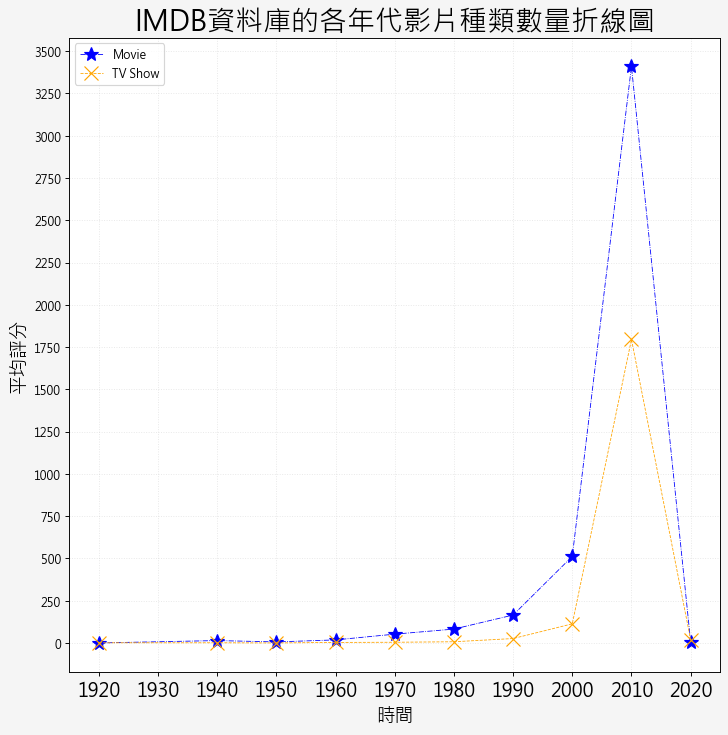

In [49]:
# 建立折線圖

listy1 = dict(df_sample[df_sample['type']=="Movie"].groupby('release_year')['show_id'].count())
listy2 = dict(df_sample[df_sample['type']=='TV Show'].groupby('release_year')['show_id'].count())
listx = list(df_sample['release_year'].unique())
# release_year 分組的數量串列有缺項，使用 for 迴圈補上0使之與rating串列對齊
for i in listx:
    if i not in listy1:
        listy1[i]=0
    if i not in listy2:
        listy2[i]=0
listx.sort()
listy1 = list(pd.Series(listy1).sort_index(ascending=True))
listy2 = list(pd.Series(listy2).sort_index(ascending=True))

plt.figure(figsize=[10,10],dpi=84,facecolor='whitesmoke')

plt.plot(listx,listy1,ls="-.",lw=0.7,marker='*',ms=12, color = 'blue', label="Movie")
plt.plot(listx,listy2,ls="--",lw=0.7,marker='x',ms=12, color = 'orange', label='TV Show')
plt.xlabel("時間",fontsize=16)
plt.ylabel("平均評分",fontsize=16)
plt.xticks(range(1920,2030,10),fontsize=16)
plt.yticks(range(0,3750,250))
plt.title("IMDB資料庫的各年代影片種類數量折線圖",fontsize=24)
plt.legend()
plt.grid(ls=":",alpha=0.3)
plt.rcParams['font.sans-serif'] = 'Microsoft JhengHei'
plt.rcParams['axes.unicode_minus'] = False
plt.show()

In [12]:
# 分析各種類評分狀況
print(list(df_sample[df_sample['type']=="Movie"].groupby('rating')['show_id'].count()))
print(list(df_sample[df_sample['type']=='TV Show'].groupby('rating')['show_id'].count()))
print('-'*30)
print(df_sample[df_sample['type']=="Movie"].groupby('rating')['show_id'].count())
print(df_sample[df_sample['type']=='TV Show'].groupby('rating')['show_id'].count())
print('-'*30)
print(list(df_sample['type'].unique()))
print(dict(df_sample[df_sample['type']=="Movie"].groupby('rating')['show_id'].count()))

[180, 22, 76, 303, 758, 1382, 1210, 320, 14]
[151, 1, 1, 14, 47, 123, 335, 699, 567, 31]
------------------------------
rating
0     180
2      22
3      76
4     303
5     758
6    1382
7    1210
8     320
9      14
Name: show_id, dtype: int64
rating
0    151
1      1
2      1
3     14
4     47
5    123
6    335
7    699
8    567
9     31
Name: show_id, dtype: int64
------------------------------
['Movie', 'TV Show']
{0: 180, 2: 22, 3: 76, 4: 303, 5: 758, 6: 1382, 7: 1210, 8: 320, 9: 14}


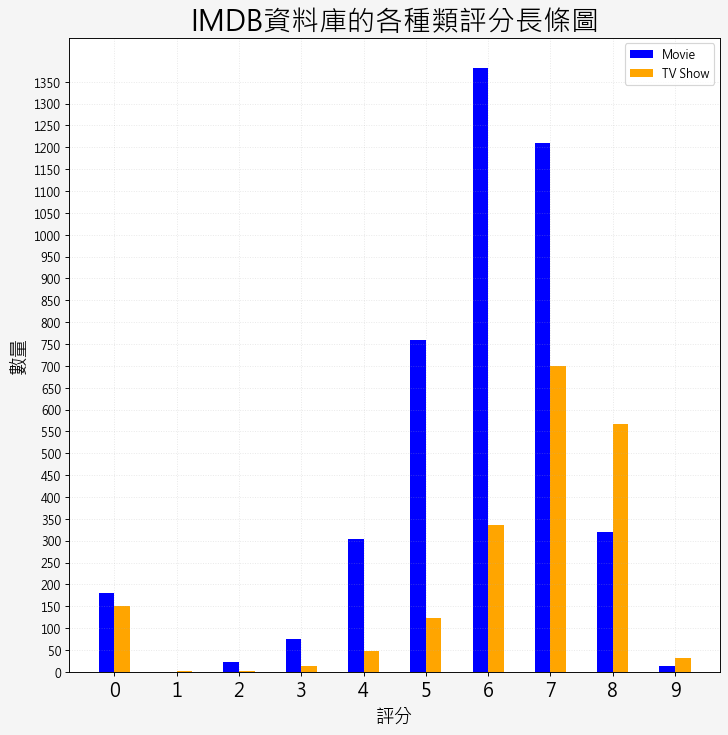

In [13]:
# 建立並列長條圖

listy1 = dict(df_sample[df_sample['type']=="Movie"].groupby('rating')['show_id'].count())
listy2 = dict(df_sample[df_sample['type']=='TV Show'].groupby('rating')['show_id'].count())
listx = list(df_sample['rating'].unique())
# rating 分組的數量串列有缺項，使用 for 迴圈補上0使之與rating串列對齊
for i in listx:
    if i not in listy1:
        listy1[i]=0
    if i not in listy2:
        listy2[i]=0
listx.sort()
listy1 = list(pd.Series(listy1).sort_index(ascending=True))
listy2 = list(pd.Series(listy2).sort_index(ascending=True))
# print(listx)
# print(listy1)
# print(listy2)
        
width = 0.25
listx1 = [x - width/2 for x in range(len(listx))]
listx2 = [x + width/2 for x in range(len(listx))]
# print(listx1)
# print(listy1)

plt.figure(figsize=[10,10],dpi=84,facecolor='whitesmoke')

plt.bar(listx1,listy1,width=width, color = 'blue', label="Movie")
plt.bar(listx2,listy2,width=width, color = 'orange', label='TV Show')
plt.xlabel("評分",fontsize=16)
plt.ylabel("數量",fontsize=16)
plt.xticks(listx,fontsize=16)
plt.yticks(range(0,1400,50))
plt.title("IMDB資料庫的各種類評分長條圖",fontsize=24)
plt.legend()
plt.grid(ls=":",alpha=0.3)
plt.rcParams['font.sans-serif'] = 'Microsoft JhengHei'
plt.rcParams['axes.unicode_minus'] = False
plt.show()

In [14]:
# 分析不同年代的平均評分
print(df_sample['release_year'].unique())
print(list(df_sample[df_sample['type']=="Movie"].groupby('release_year')['rating'].mean()))
print(list(df_sample[df_sample['type']=='TV Show'].groupby('release_year')['rating'].mean()))
print(df_sample[df_sample['type']=="Movie"].groupby('release_year')['rating'].mean())
print(df_sample[df_sample['type']=='TV Show'].groupby('release_year')['rating'].mean())

[2010 2000 1980 1990 1970 1960 1950 2020 1940 1920]
[6.071428571428571, 6.833333333333333, 6.666666666666667, 6.403846153846154, 6.451219512195122, 6.4, 6.162109375, 5.680351906158358, 5.5]
[0.0, 5.0, 8.0, 8.0, 7.0, 6.346153846153846, 6.221238938053097, 6.383286908077994, 6.842105263157895]
release_year
1940    6.071429
1950    6.833333
1960    6.666667
1970    6.403846
1980    6.451220
1990    6.400000
2000    6.162109
2010    5.680352
2020    5.500000
Name: rating, dtype: float64
release_year
1920    0.000000
1940    5.000000
1960    8.000000
1970    8.000000
1980    7.000000
1990    6.346154
2000    6.221239
2010    6.383287
2020    6.842105
Name: rating, dtype: float64


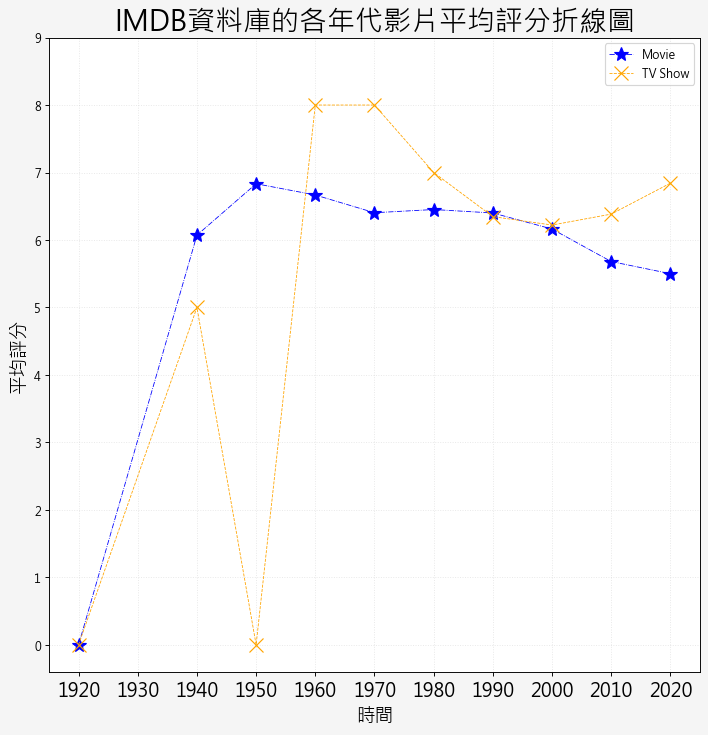

In [17]:
# 建立折線圖

listy1 = dict(df_sample[df_sample['type']=="Movie"].groupby('release_year')['rating'].mean())
listy2 = dict(df_sample[df_sample['type']=='TV Show'].groupby('release_year')['rating'].mean())
listx = list(df_sample['release_year'].unique())
# release_year 分組的數量串列有缺項，使用 for 迴圈補上0使之與rating串列對齊
for i in listx:
    if i not in listy1:
        listy1[i]=0
    if i not in listy2:
        listy2[i]=0
listx.sort()
listy1 = list(pd.Series(listy1).sort_index(ascending=True))
listy2 = list(pd.Series(listy2).sort_index(ascending=True))
# print(listx)
# print(listy1)
# print(listy2)

plt.figure(figsize=[10,10],dpi=84,facecolor='whitesmoke')

plt.plot(listx,listy1,ls="-.",lw=0.7,marker='*',ms=12, color = 'blue', label="Movie")
plt.plot(listx,listy2,ls="--",lw=0.7,marker='x',ms=12, color = 'orange', label='TV Show')
plt.xlabel("時間",fontsize=16)
plt.ylabel("平均評分",fontsize=16)
plt.xticks(range(1920,2030,10),fontsize=16)
plt.yticks(range(0,10,1))
plt.title("IMDB資料庫的各年代影片平均評分折線圖",fontsize=24)
plt.legend()
plt.grid(ls=":",alpha=0.3)
plt.rcParams['font.sans-serif'] = 'Microsoft JhengHei'
plt.rcParams['axes.unicode_minus'] = False
plt.show()

In [22]:
# 比較美國與英國參與製片的評分情況
print(df_sample[(count_appear['United States']==1)].groupby('rating')['show_id'].count())
print(df_sample[(count_appear['United States']==1)&(df_sample['type']=="Movie")].groupby('rating')['show_id'].count())
print(df_sample[(count_appear['United States']==1)&(df_sample['type']=='TV Show')].groupby('rating')['show_id'].count())
print("-"*30)
print(df_sample[(count_appear['United Kingdom']==1)].groupby('rating')['show_id'].count())
print(df_sample[(count_appear['United Kingdom']==1)&(df_sample['type']=="Movie")].groupby('rating')['show_id'].count())
print(df_sample[(count_appear['United Kingdom']==1)&(df_sample['type']=='TV Show')].groupby('rating')['show_id'].count())
print("-"*30)
print("US:",country_count['United States'],", UK:",country_count['United Kingdom'])

rating
0     50
2      8
3     39
4    136
5    414
6    787
7    827
8    342
9      6
Name: show_id, dtype: int64
rating
0     31
2      8
3     36
4    123
5    380
6    661
7    573
8    111
Name: show_id, dtype: int64
rating
0     19
3      3
4     13
5     34
6    126
7    254
8    231
9      6
Name: show_id, dtype: int64
------------------------------
rating
0     19
3      4
4     32
5     61
6    169
7    203
8    106
9      7
Name: show_id, dtype: int64
rating
0      8
3      2
4     25
5     47
6    134
7    129
8     32
9      1
Name: show_id, dtype: int64
rating
0    11
3     2
4     7
5    14
6    35
7    74
8    74
9     6
Name: show_id, dtype: int64
------------------------------
US: 2609 , UK: 601


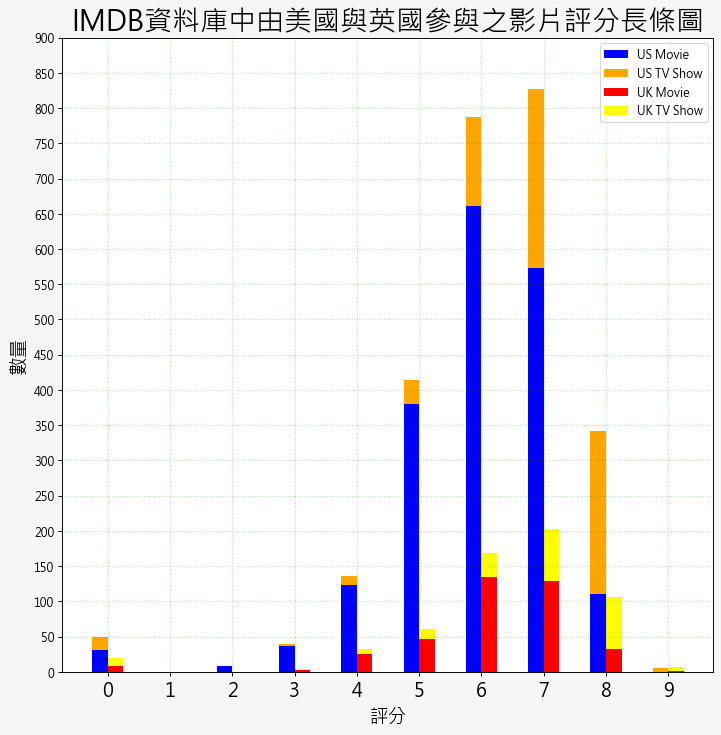

In [25]:
# 建立並列堆疊長條圖

listy11 = dict(df_sample[(count_appear['United States']==1)&(df_sample['type']=="Movie")].groupby('rating')['show_id'].count())
listy12 = dict(df_sample[(count_appear['United States']==1)&(df_sample['type']=='TV Show')].groupby('rating')['show_id'].count())
listy21 = dict(df_sample[(count_appear['United Kingdom']==1)&(df_sample['type']=="Movie")].groupby('rating')['show_id'].count())
listy22 = dict(df_sample[(count_appear['United Kingdom']==1)&(df_sample['type']=='TV Show')].groupby('rating')['show_id'].count())
listx = list(df_sample['rating'].unique())
# rating 分組的數量串列有缺項，使用 for 迴圈補上0使之與rating串列對齊
for i in listx:
    if i not in listy11:
        listy11[i]=0
    if i not in listy12:
        listy12[i]=0
    if i not in listy21:
        listy21[i]=0
    if i not in listy22:
        listy22[i]=0
listx.sort()
listy11 = list(pd.Series(listy11).sort_index(ascending=True))
listy12 = list(pd.Series(listy12).sort_index(ascending=True))
listy21 = list(pd.Series(listy21).sort_index(ascending=True))
listy22 = list(pd.Series(listy22).sort_index(ascending=True))
# print(listx)
# print(listy1)
# print(listy2)
        
width = 0.25
listx1 = [x - width/2 for x in range(len(listx))]
listx2 = [x + width/2 for x in range(len(listx))]
# print(listx1)
# print(listy1)

plt.figure(figsize=[10,10],dpi=84,facecolor='whitesmoke')

plt.bar(listx1,listy11,width=width, color = 'blue', label="US Movie")
plt.bar(listx1,listy12,width=width, color = 'orange', label='US TV Show',bottom=listy11)
plt.bar(listx2,listy21,width=width, color = 'red', label="UK Movie")
plt.bar(listx2,listy22,width=width, color = 'yellow', label='UK TV Show',bottom=listy21)
plt.xlabel("評分",fontsize=16)
plt.ylabel("數量",fontsize=16)
plt.xticks(listx,fontsize=16)
plt.yticks(range(0,950,50))
plt.title("IMDB資料庫中由美國與英國參與之影片評分長條圖",fontsize=24)
plt.legend()
plt.grid(color='green',ls=":",alpha=0.3)
plt.rcParams['font.sans-serif'] = 'Microsoft JhengHei'
plt.rcParams['axes.unicode_minus'] = False
plt.show()

In [27]:
# 分析2010年代美國製片的評分情況
print(df_sample[(count_appear['United States']==1)].groupby('rating')['show_id'].count())
print("-"*30)
print(df_sample[(count_appear['United States']==1)&(df_sample['release_year']==2010)].groupby('rating')['show_id'].count())

rating
0     50
2      8
3     39
4    136
5    414
6    787
7    827
8    342
9      6
Name: show_id, dtype: int64
------------------------------
rating
0     44
2      8
3     37
4    117
5    350
6    591
7    636
8    282
9      6
Name: show_id, dtype: int64


[0, 2, 3, 4, 5, 6, 7, 8, 9]
[44, 8, 37, 117, 350, 591, 636, 282, 6]


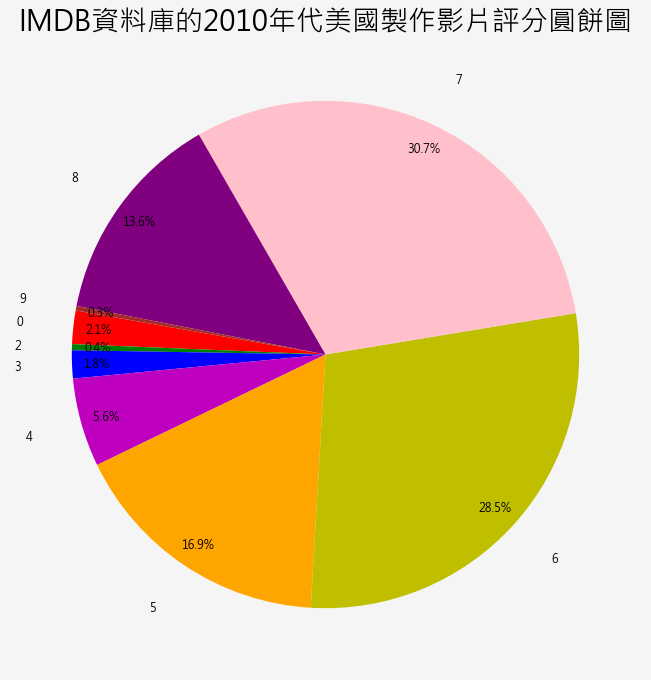

In [45]:
# 繪製圓餅圖

listy = dict(df_sample[(count_appear['United States']==1)&(df_sample['release_year']==2010)].groupby('rating')['show_id'].count())
listx = list(df_sample[(count_appear['United States']==1)]['rating'].unique())

listx.sort()
listy = list(pd.Series(listy).sort_index(ascending=True))
print(listx)
print(listy)


sizes = listy
labels = listx
colors = ['r','g','b','m','orange','y','pink','purple','brown','c']

plt.figure(figsize=[10,10],dpi=84,facecolor='whitesmoke')
plt.pie(sizes,labels=labels,colors=colors,labeldistance=1.2,autopct='%2.1f%%',pctdistance=0.9,shadow=False,startangle=170)
plt.title("IMDB資料庫的2010年代美國製作影片評分圓餅圖",fontsize=24)
plt.rcParams['font.sans-serif'] = 'Microsoft JhengHei'
plt.rcParams['axes.unicode_minus'] = False
plt.show()

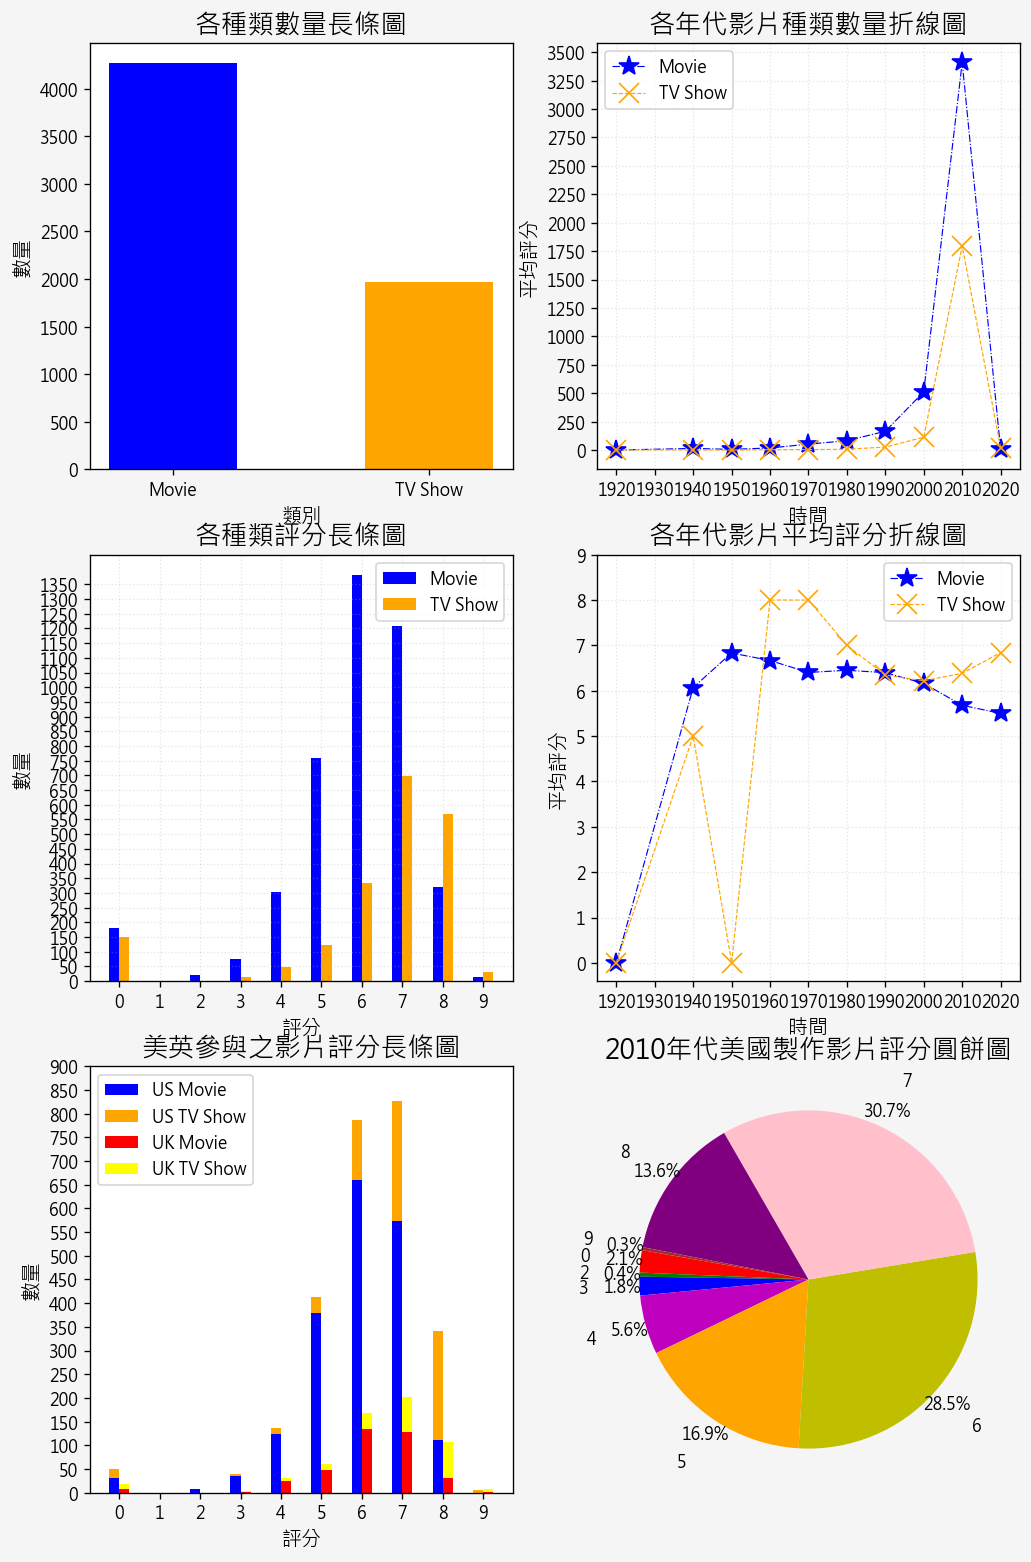

In [12]:
# 以下結果合併以上6張圖表
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=[10,16],dpi=120,facecolor='whitesmoke')

plt.subplot(321)
listy = list(df_sample.groupby('type')['show_id'].count())
listx = list(df_sample['type'].unique())
plt.bar(listx,listy,width=0.5,color=['blue','orange'])
plt.xlabel("類別",fontsize=12)
plt.ylabel("數量",fontsize=12)
plt.xticks(listx,fontsize=10)
plt.title("各種類數量長條圖",fontsize=16)

plt.subplot(322)
listy1 = dict(df_sample[df_sample['type']=="Movie"].groupby('release_year')['show_id'].count())
listy2 = dict(df_sample[df_sample['type']=='TV Show'].groupby('release_year')['show_id'].count())
listx = list(df_sample['release_year'].unique())
for i in listx:
    if i not in listy1:
        listy1[i]=0
    if i not in listy2:
        listy2[i]=0
listx.sort()
listy1 = list(pd.Series(listy1).sort_index(ascending=True))
listy2 = list(pd.Series(listy2).sort_index(ascending=True))
plt.plot(listx,listy1,ls="-.",lw=0.7,marker='*',ms=12, color = 'blue', label="Movie")
plt.plot(listx,listy2,ls="--",lw=0.7,marker='x',ms=12, color = 'orange', label='TV Show')
plt.xlabel("時間",fontsize=12)
plt.ylabel("平均評分",fontsize=12)
plt.xticks(range(1920,2030,10),fontsize=10)
plt.yticks(range(0,3750,250))
plt.title("各年代影片種類數量折線圖",fontsize=16)
plt.legend()
plt.grid(ls=":",alpha=0.3)

plt.subplot(323)
listy1 = dict(df_sample[df_sample['type']=="Movie"].groupby('rating')['show_id'].count())
listy2 = dict(df_sample[df_sample['type']=='TV Show'].groupby('rating')['show_id'].count())
listx = list(df_sample['rating'].unique())
for i in listx:
    if i not in listy1:
        listy1[i]=0
    if i not in listy2:
        listy2[i]=0
listx.sort()
listy1 = list(pd.Series(listy1).sort_index(ascending=True))
listy2 = list(pd.Series(listy2).sort_index(ascending=True)) 
width = 0.25
listx1 = [x - width/2 for x in range(len(listx))]
listx2 = [x + width/2 for x in range(len(listx))]
plt.bar(listx1,listy1,width=width, color = 'blue', label="Movie")
plt.bar(listx2,listy2,width=width, color = 'orange', label='TV Show')
plt.xlabel("評分",fontsize=12)
plt.ylabel("數量",fontsize=12)
plt.xticks(listx,fontsize=10)
plt.yticks(range(0,1400,50))
plt.title("各種類評分長條圖",fontsize=16)
plt.legend()
plt.grid(ls=":",alpha=0.3)

plt.subplot(324)
listy1 = dict(df_sample[df_sample['type']=="Movie"].groupby('release_year')['rating'].mean())
listy2 = dict(df_sample[df_sample['type']=='TV Show'].groupby('release_year')['rating'].mean())
listx = list(df_sample['release_year'].unique())
for i in listx:
    if i not in listy1:
        listy1[i]=0
    if i not in listy2:
        listy2[i]=0
listx.sort()
listy1 = list(pd.Series(listy1).sort_index(ascending=True))
listy2 = list(pd.Series(listy2).sort_index(ascending=True))
plt.plot(listx,listy1,ls="-.",lw=0.7,marker='*',ms=12, color = 'blue', label="Movie")
plt.plot(listx,listy2,ls="--",lw=0.7,marker='x',ms=12, color = 'orange', label='TV Show')
plt.xlabel("時間",fontsize=12)
plt.ylabel("平均評分",fontsize=12)
plt.xticks(range(1920,2030,10),fontsize=10)
plt.yticks(range(0,10,1))
plt.title("各年代影片平均評分折線圖",fontsize=16)
plt.legend()
plt.grid(ls=":",alpha=0.3)

plt.subplot(325)
listy11 = dict(df_sample[(count_appear['United States']==1)&(df_sample['type']=="Movie")].groupby('rating')['show_id'].count())
listy12 = dict(df_sample[(count_appear['United States']==1)&(df_sample['type']=='TV Show')].groupby('rating')['show_id'].count())
listy21 = dict(df_sample[(count_appear['United Kingdom']==1)&(df_sample['type']=="Movie")].groupby('rating')['show_id'].count())
listy22 = dict(df_sample[(count_appear['United Kingdom']==1)&(df_sample['type']=='TV Show')].groupby('rating')['show_id'].count())
listx = list(df_sample['rating'].unique())
for i in listx:
    if i not in listy11:
        listy11[i]=0
    if i not in listy12:
        listy12[i]=0
    if i not in listy21:
        listy21[i]=0
    if i not in listy22:
        listy22[i]=0
listx.sort()
listy11 = list(pd.Series(listy11).sort_index(ascending=True))
listy12 = list(pd.Series(listy12).sort_index(ascending=True))
listy21 = list(pd.Series(listy21).sort_index(ascending=True))
listy22 = list(pd.Series(listy22).sort_index(ascending=True))
width = 0.25
listx1 = [x - width/2 for x in range(len(listx))]
listx2 = [x + width/2 for x in range(len(listx))]
plt.bar(listx1,listy11,width=width, color = 'blue', label="US Movie")
plt.bar(listx1,listy12,width=width, color = 'orange', label='US TV Show',bottom=listy11)
plt.bar(listx2,listy21,width=width, color = 'red', label="UK Movie")
plt.bar(listx2,listy22,width=width, color = 'yellow', label='UK TV Show',bottom=listy21)
plt.xlabel("評分",fontsize=12)
plt.ylabel("數量",fontsize=12)
plt.xticks(listx,fontsize=10)
plt.yticks(range(0,950,50))
plt.title("美英參與之影片評分長條圖",fontsize=16)
plt.legend()

plt.subplot(326)
listy = dict(df_sample[(count_appear['United States']==1)&(df_sample['release_year']==2010)].groupby('rating')['show_id'].count())
listx = list(df_sample[(count_appear['United States']==1)]['rating'].unique())
listx.sort()
listy = list(pd.Series(listy).sort_index(ascending=True))
sizes = listy
labels = listx
colors = ['r','g','b','m','orange','y','pink','purple','brown','c']
plt.pie(sizes,labels=labels,colors=colors,labeldistance=1.3,autopct='%2.1f%%',pctdistance=1.1,shadow=False,startangle=170)
plt.title("2010年代美國製作影片評分圓餅圖",fontsize=16)

plt.rcParams['font.sans-serif'] = 'Microsoft JhengHei'
plt.rcParams['axes.unicode_minus'] = False
plt.show()